# Testing PINN implementations

- Autograd vs. PyTorch
- Gradient decent methods (optimization methods)
- Learning rates (epochs)

In [1]:
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src import *

In [2]:
##################################################################################
# CONFIGURATION INFORMATION : 
##################################################################################
# NETWORK ARCITECTURE : 
num_hidden_neurons = [2,2]  # A simple network just for testing
opt_met            = ['GD', 'GD-adam', 'SGD-adam']
# HYPERPARAMETERS : 
epochs         = 100  
learning_rate  = [0.1, 0.01, 0.001, 0.0001]
seed           = 36  # Most similar seed for numpy.random.seed and PyTorch.manual_seed
# ONLY FOR SGD : 
batch_fraction = 0.1
# GRID RESOLUTION : 
Nx = 10    # Smaller grid resolution for testing
Nt = 10    # Smaller grid resolution for testing

batch_size = 10
# MAKE X AND T : 
t, x, t_torch, x_torch, _ = create_t_and_x_batch_size(Nx,
                                                      Nt,
                                                      batch_fraction)
# CONFIGURATION INFORMATION : 
config = make_config(Nx,
                     Nt, 
                     num_hidden_neurons,
                     opt_met, 
                     epochs, 
                     learning_rate, 
                     batch_fraction,
                     batch_size,
                     seed,
                     verbose=True)

--------------------------------------
Configuration information :

Grid resolution         : Nx=10, Nt=10
Network architecture    : [2, 2]
Gradient decent method  : ['GD', 'GD-adam', 'SGD-adam']
Learning rate           : [0.1, 0.01, 0.001, 0.0001]
Epochs                  : 100
Batch fraction          : 0.1
Batch size              : 10
Seed                    : 36
--------------------------------------


In [ ]:
##################################################################################
# FUNCTIONS FOR TESTING GRADIENT DECENT METHODS AND LEARNING RATES : 
##################################################################################
def compare_cost_and_time_A(optimization_method,learning_rate):
    start_time = time.time()
    P, history = train_PINN_autograd(x,
                                     t,
                                     num_hidden_neurons,
                                     epochs,
                                     learning_rate,
                                     'tanh',
                                     seed,
                                     optimization_method=optimization_method, # 'GD', 'GD-adam', 'SGD-adam'
                                     batch_size=batch_size,
                                     shuffle=True,
                                     replacement=False,
                                     verbose=False,
                                     debug=False)
    end_time = time.time()
    tot_time = end_time - start_time
    return tot_time, history, P
def compare_cost_and_time_P(optimization_method,learning_rate):
    start_time = time.time()
    P, history = train_PINN_pyTorch(x_torch,
                                    t_torch,
                                    num_hidden_neurons,
                                    epochs,
                                    learning_rate,
                                    'tanh',
                                    seed,
                                    optimization_method=optimization_method, # 'GD', 'GD-adam', 'SGD-adam'
                                    batch_size=batch_size,
                                    shuffle=True,
                                    replacement=False,
                                    verbose=False,
                                    debug=False)
    end_time = time.time()
    tot_time = end_time - start_time
    return tot_time, history, P

In [4]:
##################################################################################
# TESTING PINN-IMPLEMENTATINOS : 
##################################################################################
learning_rates = learning_rate
# RUN TEST : 
results_A = {}
results_P = {}
for lr in learning_rates:
    print('----------------------------------')
    print(f'Learning rate: {lr}')
    print('----------------------------------')
    res_A = {}
    res_P = {}
    for opt in opt_met:
        print(f'Optimization method: {opt}')
        # Run the comparison for autograd and pytorch
        print('Autograd')
        time_A, hist_A, PA = compare_cost_and_time_A(opt, lr)
        print('PyTorch')
        time_P, hist_P, PP = compare_cost_and_time_P(opt, lr)
        # Save the results in dict, to plot later
        res_A[opt] = {'time': time_A, 'history': hist_A, 'P': PA}
        res_P[opt] = {'time': time_P, 'history': hist_P, 'P': PP}
        print()
    results_A[lr] = res_A
    results_P[lr] = res_P
    print()

----------------------------------
Learning rate: 0.1
----------------------------------
Optimization method: GD
Autograd
Initial cost:  36.17240711472869
Final cost:  13.016330126834214
PyTorch
Initial cost:  36.991859436035156
Final cost:  14.318469047546387

Optimization method: GD-adam
Autograd
Initial cost:  36.17240711472869
Final cost:  3.378743810392783
PyTorch
Initial cost:  36.991859436035156
Final cost:  17.605670928955078

Optimization method: SGD-adam
Autograd
Initial cost:  36.17240711472869
Final cost:  2.4285226781721247
PyTorch
Initial cost:  36.991859436035156
Final cost:  14.146410942077637


----------------------------------
Learning rate: 0.01
----------------------------------
Optimization method: GD
Autograd
Initial cost:  36.17240711472869
Final cost:  14.61439670477406
PyTorch
Initial cost:  36.991859436035156
Final cost:  14.638545036315918

Optimization method: GD-adam
Autograd
Initial cost:  36.17240711472869
Final cost:  15.66501772156352
PyTorch
Initial c

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_final_cost_vs_lr.pdf


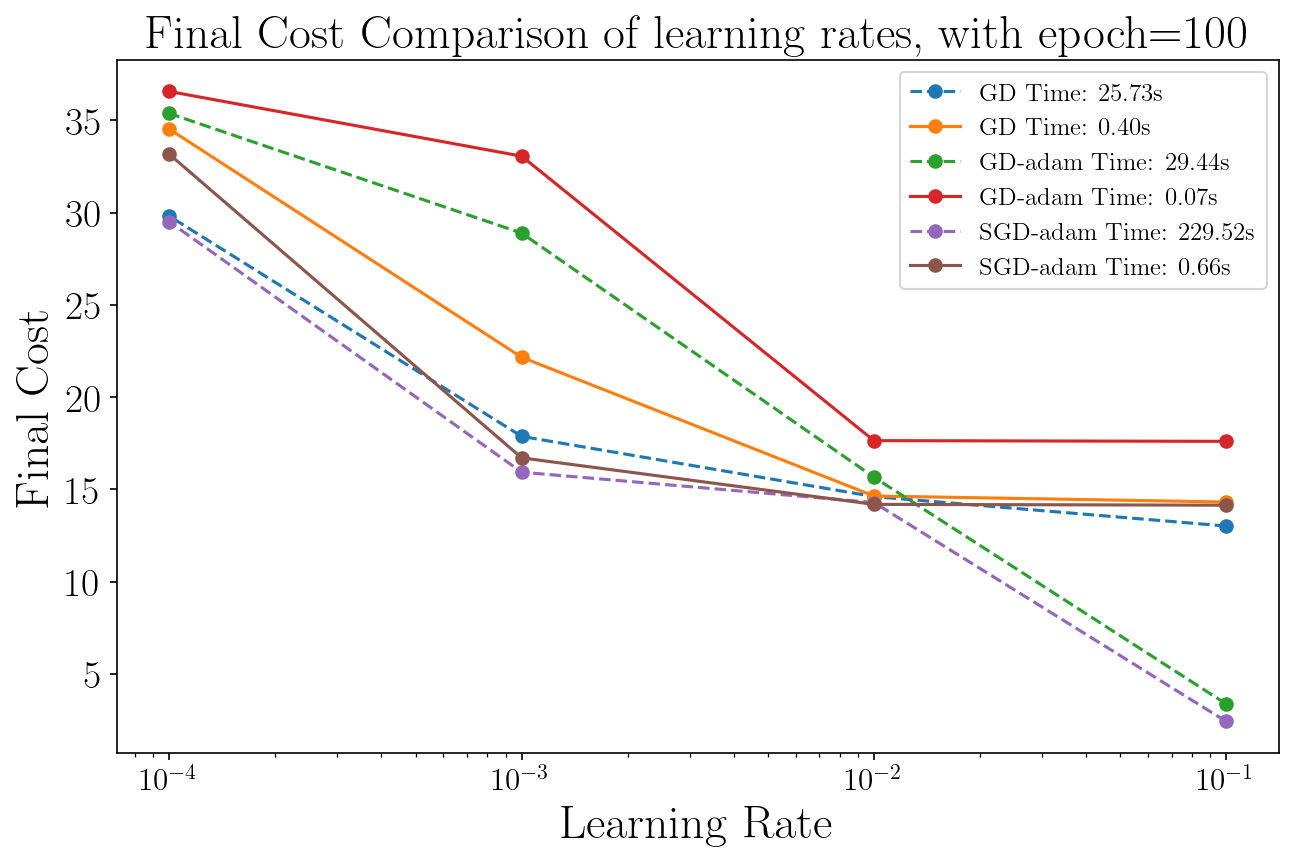

In [17]:
# Final cost comparison plot between autograd and pytorch, for optimization methods and learning rates
# Learning rates on x-axis, final cost on y-axis
# NB! ONLY PLOTTING THE EXECUTION TIME FOR THE FIRST LEARNING RATE
plt.figure(figsize=(10,6))
for opt in opt_met:
    final_costs_A = [results_A[lr][opt]['history']['cost'][-1] for lr in learning_rates]
    final_costs_P = [results_P[lr][opt]['history']['cost'][-1] for lr in learning_rates]
    time_A = [results_A[lr][opt]['time'] for lr in learning_rates]
    time_P = [results_P[lr][opt]['time'] for lr in learning_rates]
    plt.plot(learning_rates, final_costs_A, marker='o', label=f'{opt} Time: {time_A[0]:.2f}s', linestyle='--')
    plt.plot(learning_rates, final_costs_P, marker='o', label=f'{opt} Time: {time_P[0]:.2f}s', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Final Cost')
# log scale for x-axis
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.title(f'Final Cost Comparison of learning rates, with epoch={epochs}')
save_fig('test0_final_cost_vs_lr')
plt.show()

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_cost_history_lr_0p1.pdf


<Figure size 1500x900 with 0 Axes>

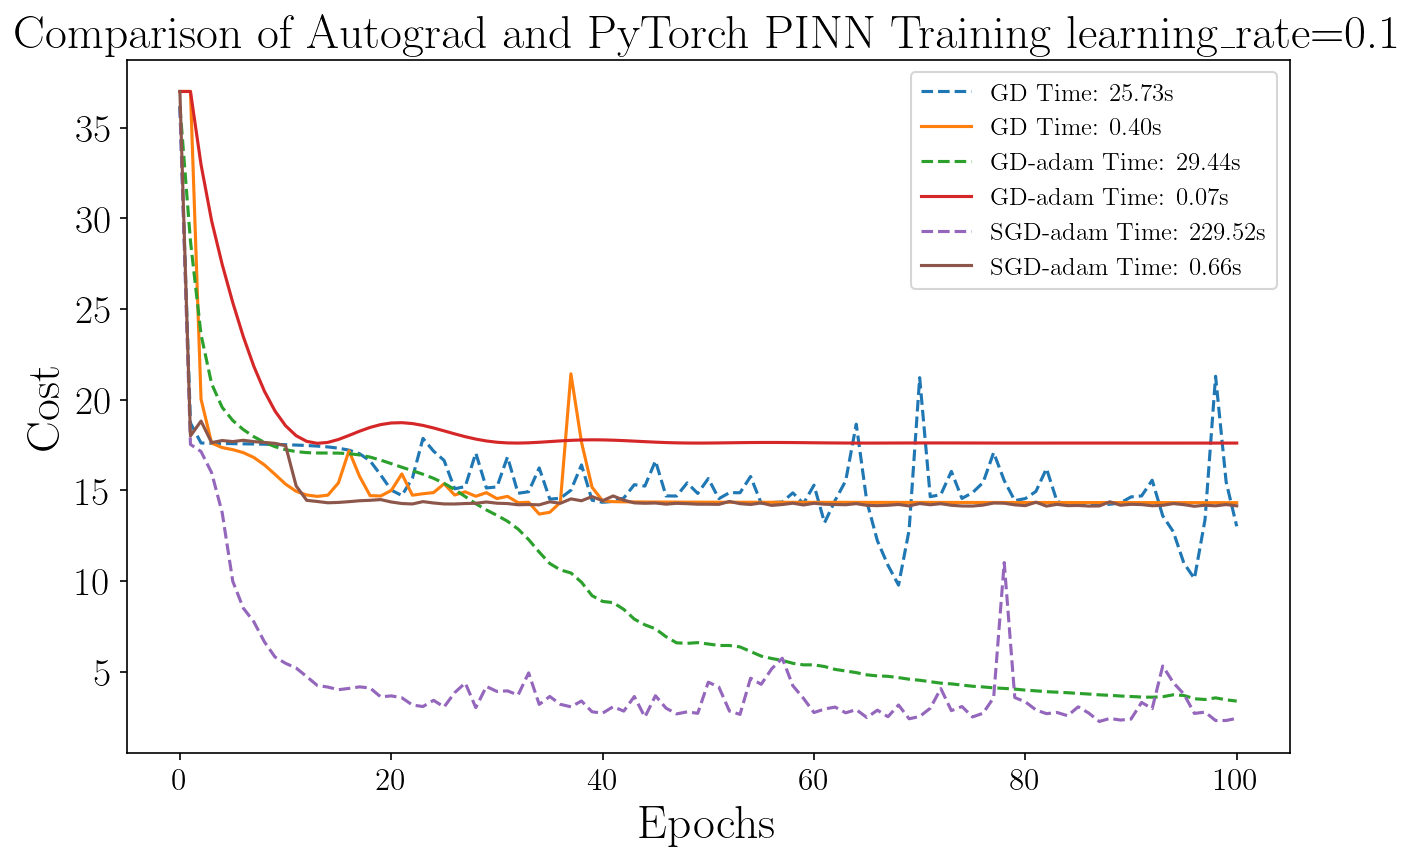

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_cost_history_lr_0p01.pdf


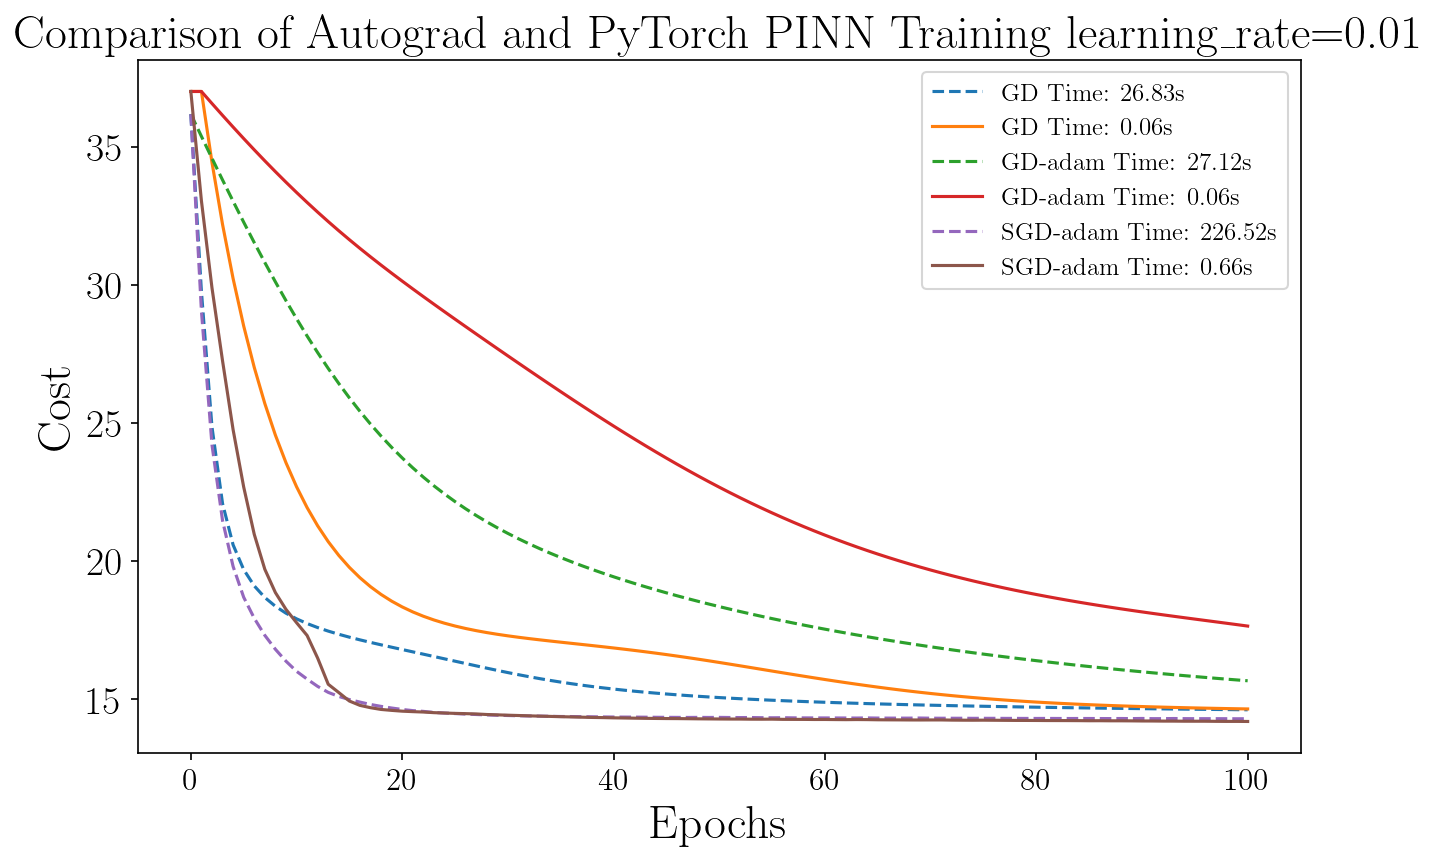

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_cost_history_lr_0p001.pdf


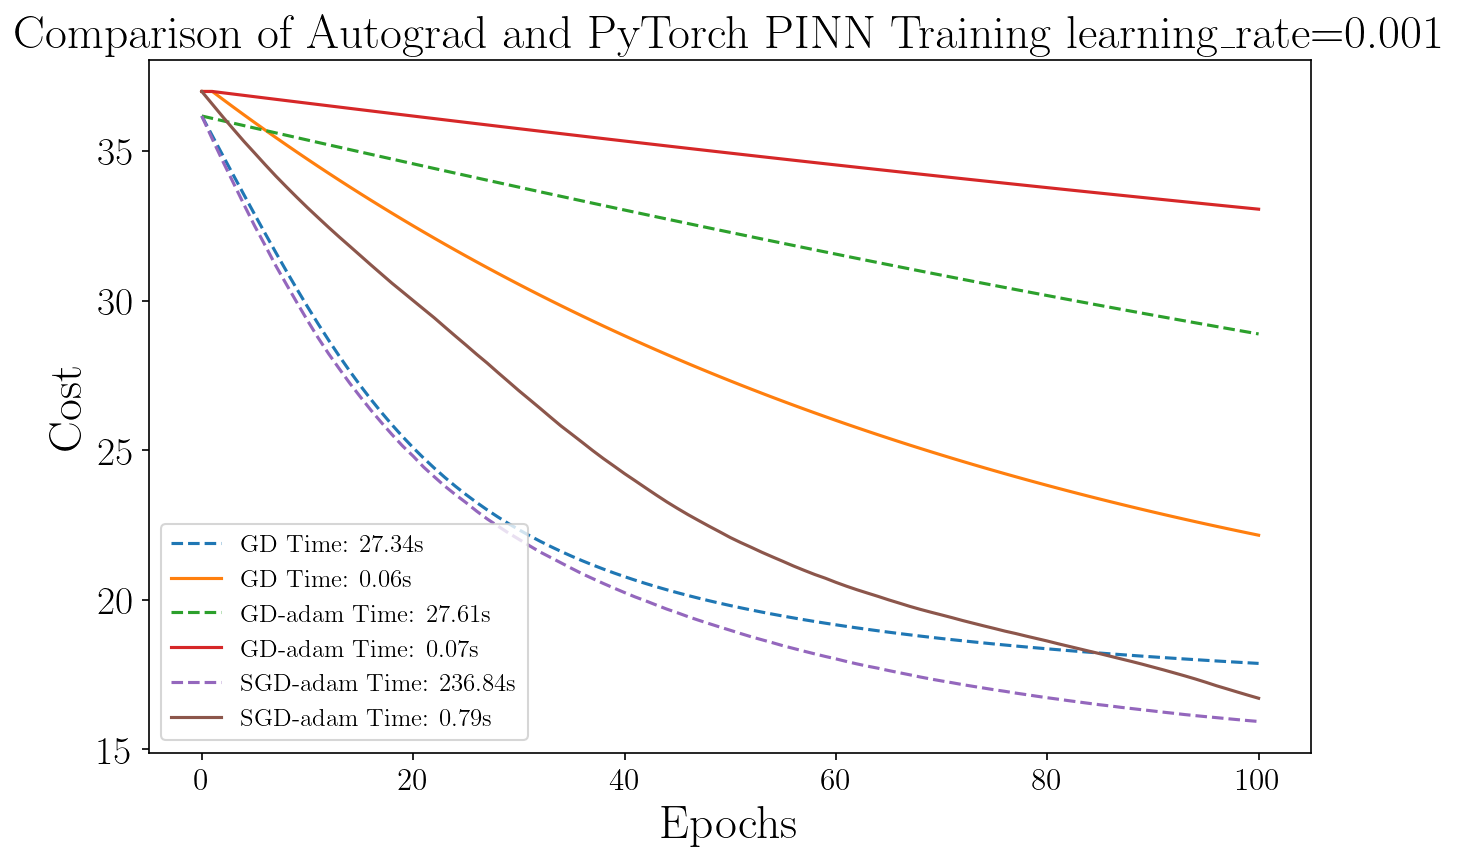

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_cost_history_lr_0p0001.pdf


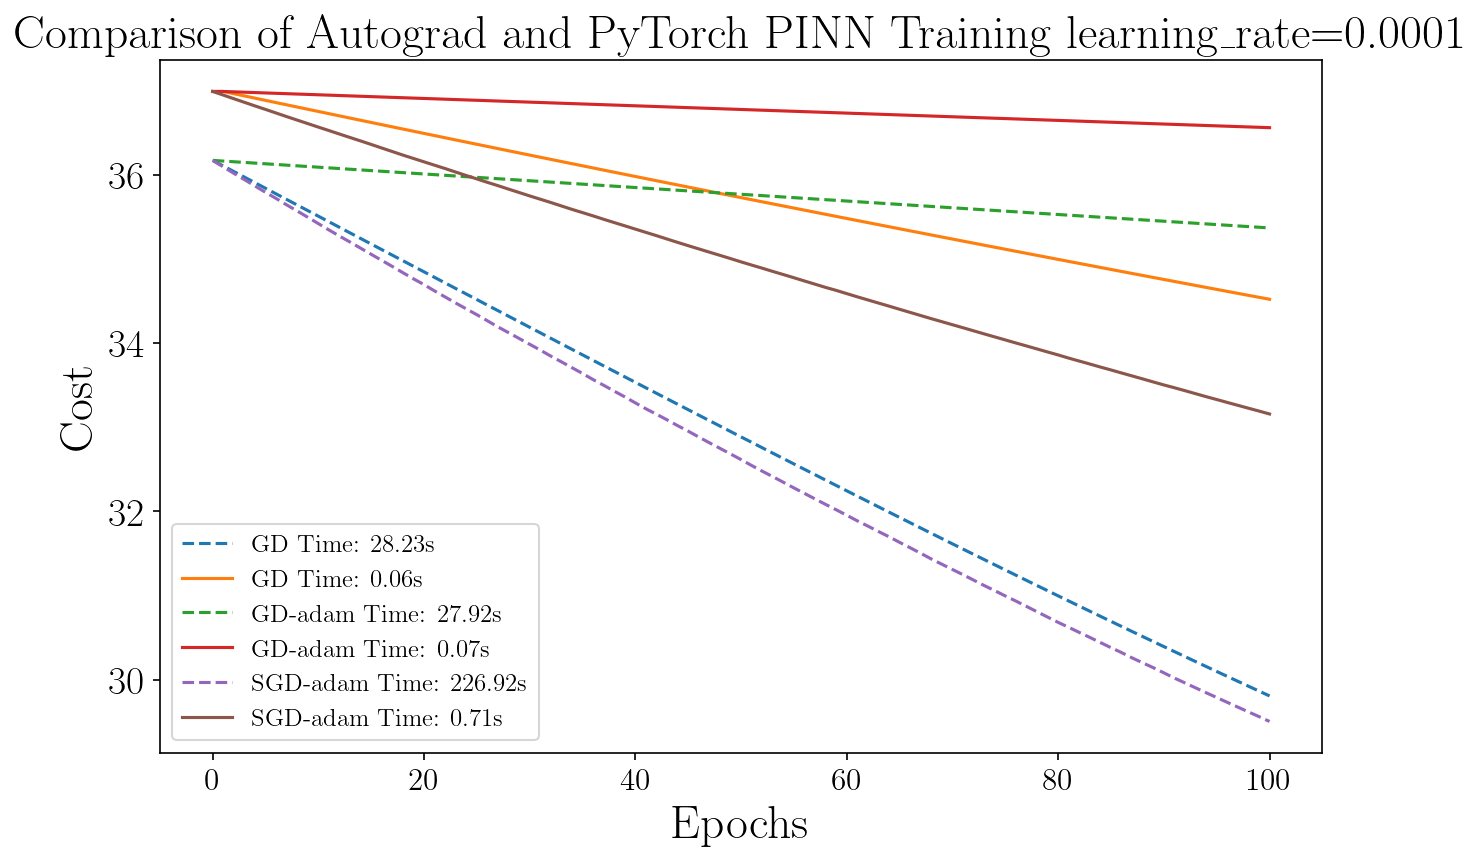

In [8]:
# Plot all the results, comparing autograd and pytorch, for different optimization methods
plt.figure(figsize=(10,6))
for learning_rate in learning_rates:
    plt.figure(figsize=(10,6))
    lr_slug = str(learning_rate).replace('.', 'p')
    for opt in opt_met: 
        plt.plot(results_A[learning_rate][opt]['history']['epoch'], results_A[learning_rate][opt]['history']['cost'], label=f'{opt} Time: {results_A[learning_rate][opt]["time"]:.2f}s', linestyle='--')
        plt.plot(results_P[learning_rate][opt]['history']['epoch'], results_P[learning_rate][opt]['history']['cost'], label=f'{opt} Time: {results_P[learning_rate][opt]["time"]:.2f}s', linestyle='-')
    #plt.yscale('log')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.title('Comparison of Autograd and PyTorch PINN Training {learning_rate='+str(learning_rate)+'}')
    save_fig(f'test0_cost_history_lr_{lr_slug}')
    plt.show()

## Just looking at the final predicitons (Appendix if at all)

In [9]:
# Comparing the best Autograd (SGD-Adam) lr=0.1 with analytical 
# And SGD-Adam PyTorch and Autograd with lr=0.01 with analytical

activation_function_P = 'tanh'
activation_function_A = tanh

PA_01 = results_A[0.1]['SGD-adam']['P']

PA_001 = results_A[0.01]['SGD-adam']['P']
PP_001 = results_P[0.01]['SGD-adam']['P']

In [10]:
##########################################################################################
print()
print('------------ Autograd ------------')
autograd_start_time = time.time()
PINN_A_solution_1   = PINN_solution(Nx,Nt,x,t,deep_neural_network,PA_01,num_hidden_neurons,activation_function_A,'autograd')
autograd_end_time   = time.time()
autograd_tot_time   = autograd_end_time - autograd_start_time
print(f'Time: {autograd_tot_time}')
print()
##########################################################################################
# USE ANALYTICAL SOLUTION : 
##########################################################################################
print('---------- Analytical ----------')
analytical_start_time = time.time()
analytical_solut_1    = analytical_solution(Nx,Nt,x,t) # tror det er samme hvilken ?!
#analytical_solut      = analytical_solution(Nx,Nt,x_torch,t_torch)
analytical_end_time   = time.time()
analytical_tot_time   = analytical_end_time - analytical_start_time
print(f'TIme: {analytical_tot_time}')
print()
##########################################################################################
# FIND MAX ABSOLUTE DIFFERENCE : 
##########################################################################################
diff_PINN_A_analytic_1 = np.max(np.abs(PINN_A_solution_1-analytical_solut_1))
print(f'Max absolute difference: {diff_PINN_A_analytic_1}')


------------ Autograd ------------
Time: 0.001544952392578125

---------- Analytical ----------
TIme: 0.0003898143768310547

Max absolute difference: 0.18516143431689008


Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_autograd_pinn_solution.pdf


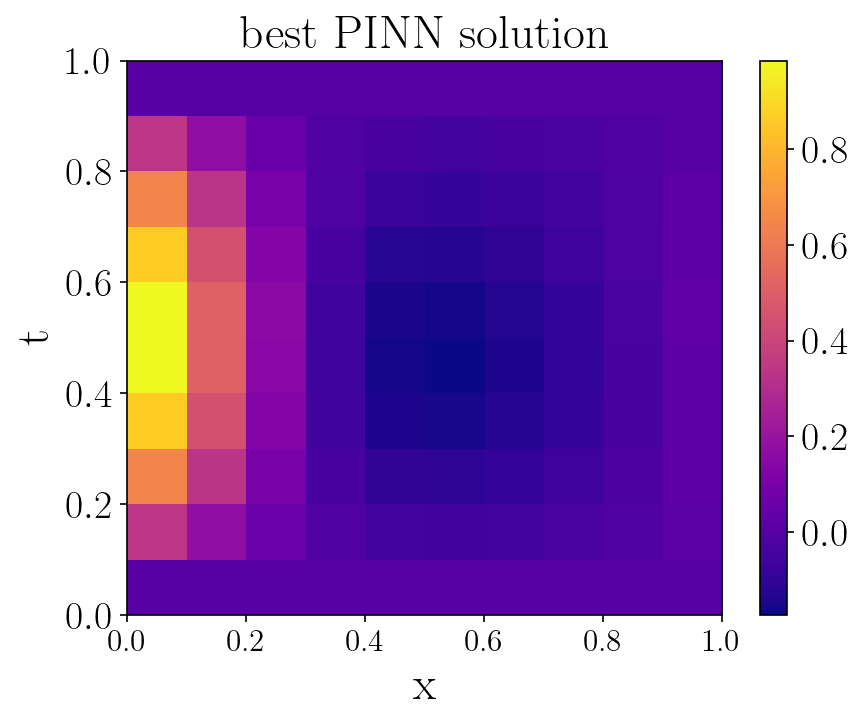

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_autograd_analytical_solution.pdf


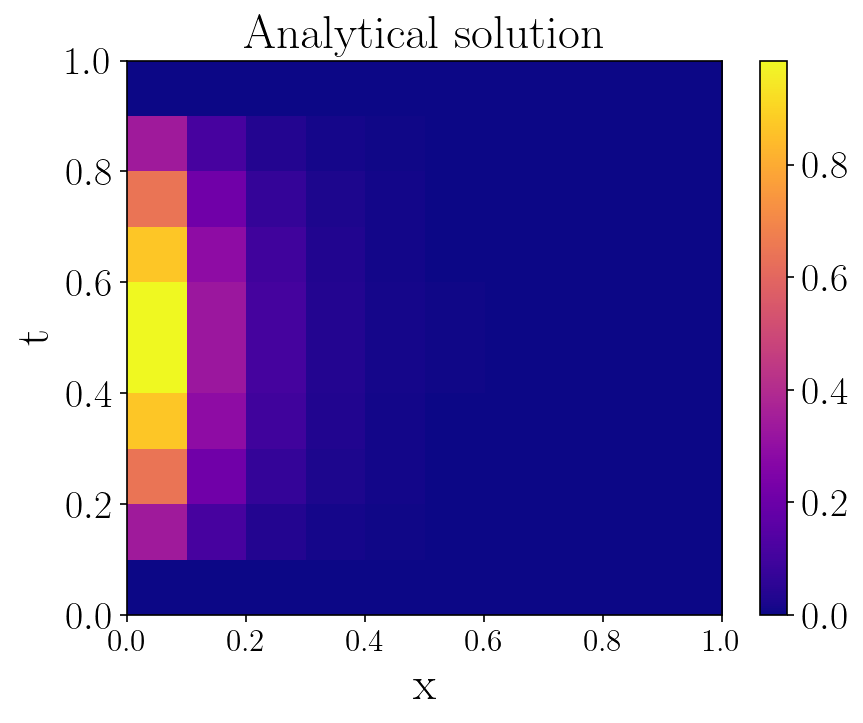

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_autograd_pinn_minus_analytical.pdf


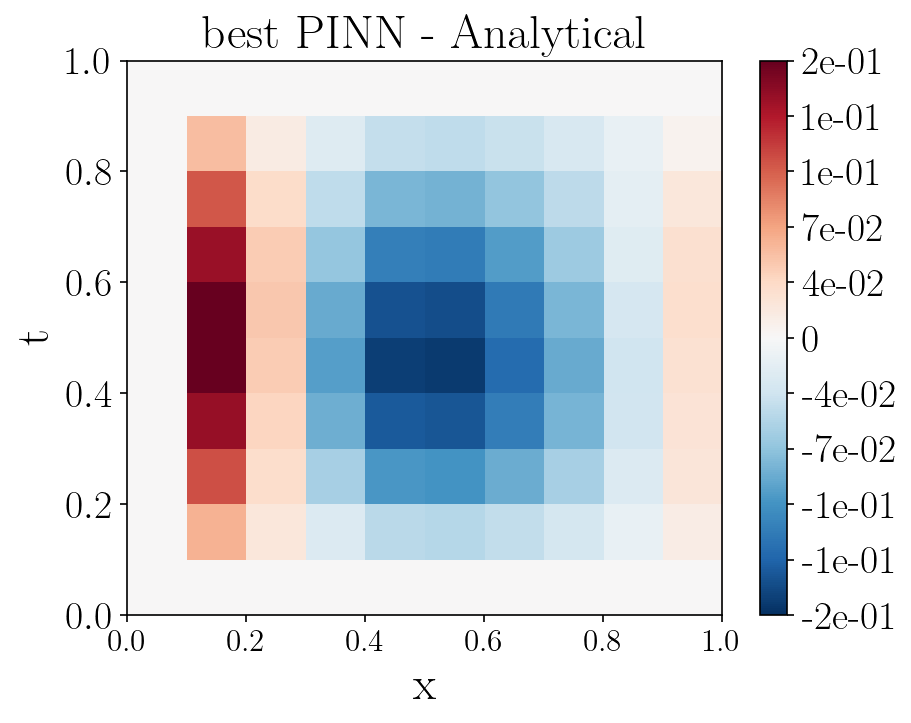

In [11]:
##########################################################################################
# PLOT SOLUTION : 
##########################################################################################
plot_imshow(x_torch, t_torch, PINN_A_solution_1, 
            cmap='plasma', title='best PINN solution', diff=False,
            save_name='test0_autograd_pinn_solution')
plot_imshow(x_torch, t_torch, analytical_solut_1, 
            cmap='plasma', title='Analytical solution', diff=False,
            save_name='test0_autograd_analytical_solution')
##########################################################################################
# PLOT DIFFERENCE : 
##########################################################################################
plot_imshow(x_torch, t_torch, (PINN_A_solution_1-analytical_solut_1), 
            cmap='RdBu_r', title='best PINN - Analytical', diff=True,
            save_name='test0_autograd_pinn_minus_analytical')

In [12]:
##########################################################################################
print()
print('------------ Autograd ------------')
autograd_start_time = time.time()
PINN_A_solution     = PINN_solution(Nx,Nt,x,t,deep_neural_network,PA_001,num_hidden_neurons,activation_function_A,'autograd')
autograd_end_time   = time.time()
autograd_tot_time   = autograd_end_time - autograd_start_time
print(f'Time: {autograd_tot_time}')
print()
print('------------ PyTorch ------------')
pytorch_start_time = time.time()
PINN_P_solution    = PINN_solution(Nx,Nt,x_torch,t_torch,Net,PP_001,num_hidden_neurons,activation_function_P,'pytorch')
pytorch_end_time   = time.time()
pytorch_tot_time   = pytorch_end_time - pytorch_start_time
print(f'Time : {pytorch_tot_time}')
print()
##########################################################################################
# USE ANALYTICAL SOLUTION : 
##########################################################################################
print('---------- Analytical ----------')
analytical_start_time = time.time()
#analytical_solut      = analytical_solution(Nx,Nt,x,t) # tror det er samme hvilken ?!
analytical_solut      = analytical_solution(Nx,Nt,x_torch,t_torch)
analytical_end_time   = time.time()
analytical_tot_time   = analytical_end_time - analytical_start_time
print(f'TIme: {analytical_tot_time}')
print()
##########################################################################################
# FIND MAX ABSOLUTE DIFFERENCE : 
##########################################################################################
diff_PINN_A_analytic = np.max(np.abs(PINN_A_solution-analytical_solut))
diff_PINN_P_analytic = np.max(np.abs(PINN_P_solution - analytical_solut))
print(f'Max absolute difference Autograd: {diff_PINN_A_analytic}')
print(f'Max absolute difference PyTorch: {diff_PINN_P_analytic}')


------------ Autograd ------------
Time: 0.0014600753784179688

------------ PyTorch ------------
Time : 0.016463756561279297

---------- Analytical ----------
TIme: 0.0008990764617919922

Max absolute difference Autograd: 0.6330892738338285
Max absolute difference PyTorch: 0.6282220855355263


Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_pytorch_lr001_pinn_solution.pdf


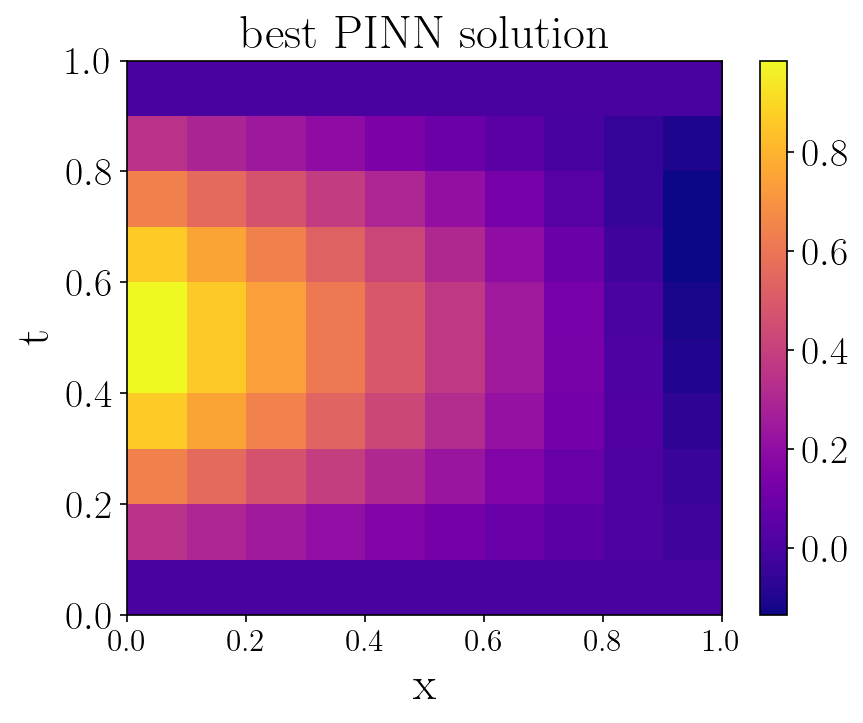

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_pytorch_lr001_analytical_solution.pdf


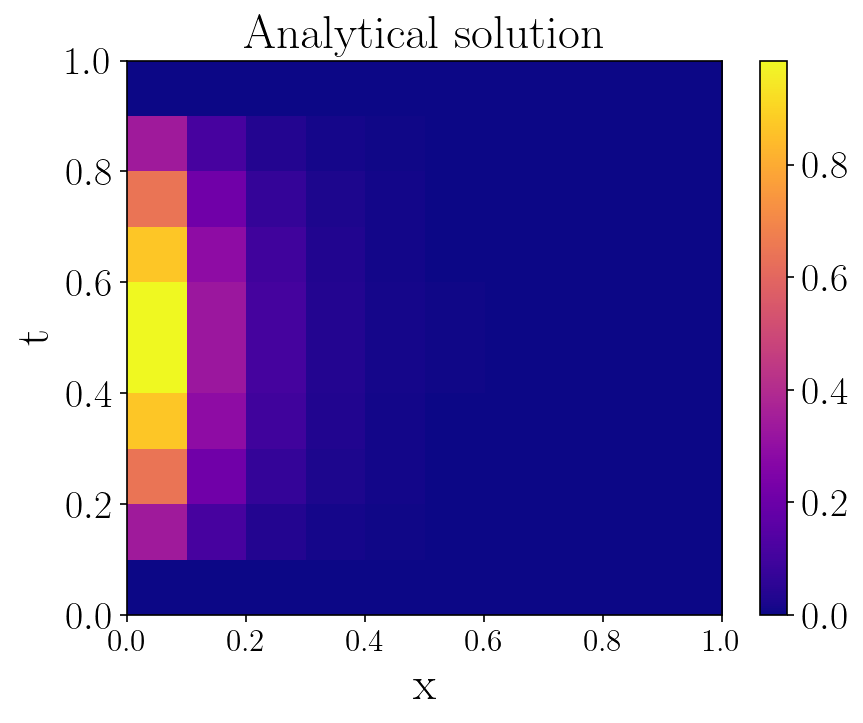

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_pytorch_lr001_pinn_minus_analytical.pdf


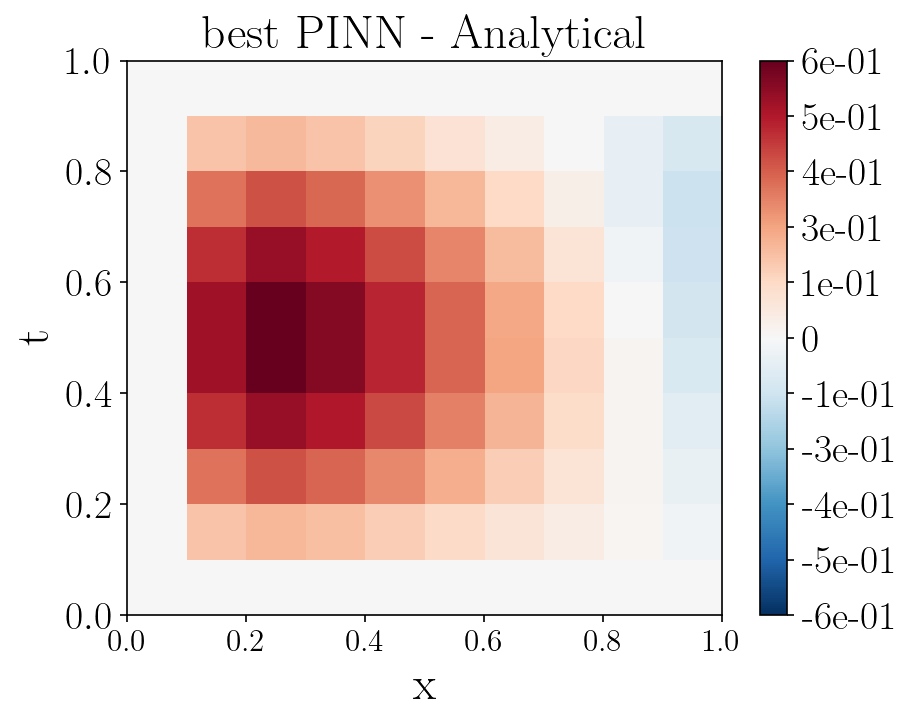

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_autograd_lr001_pinn_solution.pdf


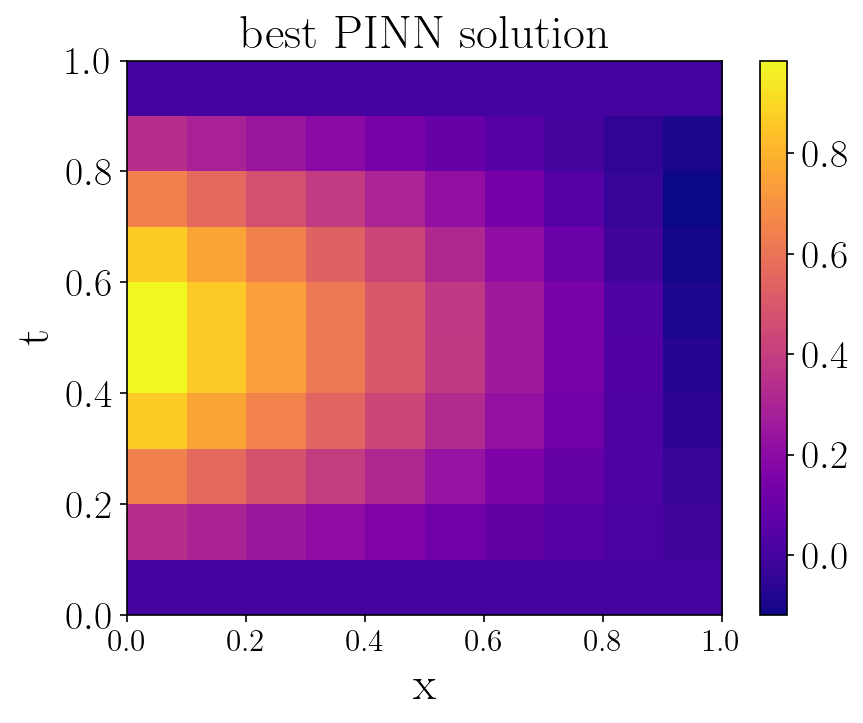

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_autograd_lr001_analytical_solution.pdf


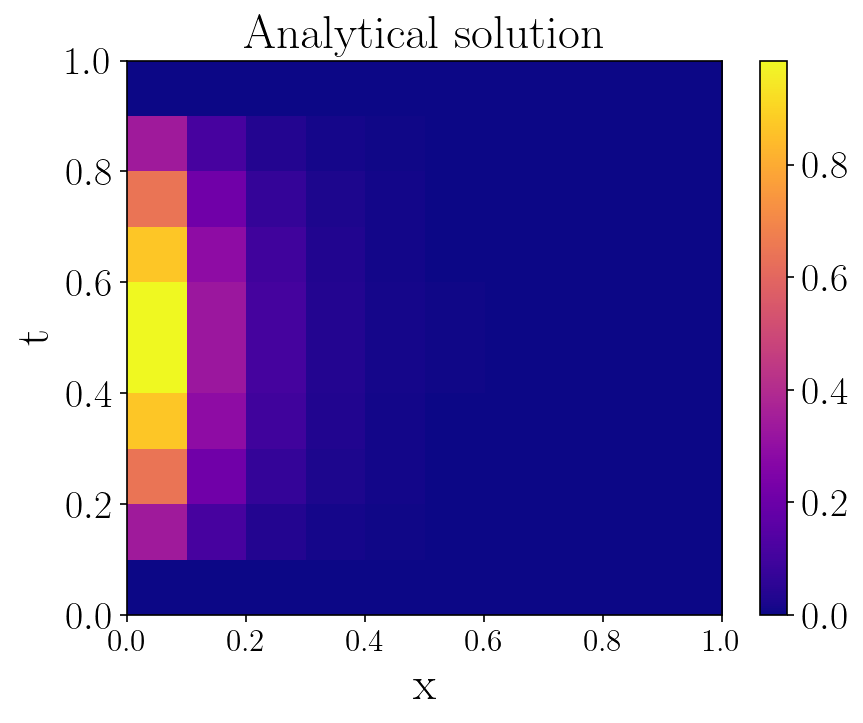

Saved figure to /Users/jennyguldvog/FYS-STK4155-Project-3/code/main_clean/outputs/test0_autograd_lr001_pinn_minus_analytical.pdf


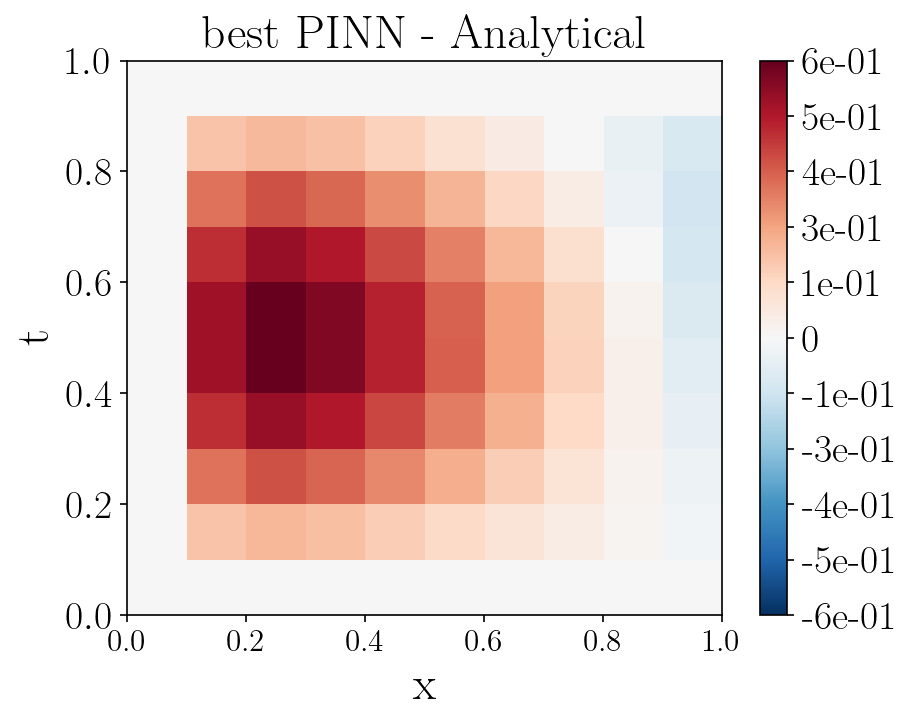

In [13]:
##########################################################################################
# PLOT SOLUTION : 
##########################################################################################
plot_imshow(x_torch, t_torch, PINN_P_solution, 
            cmap='plasma', title='best PINN solution', diff=False,
            save_name='test0_pytorch_lr001_pinn_solution')
plot_imshow(x_torch, t_torch, analytical_solut, 
            cmap='plasma', title='Analytical solution', diff=False,
            save_name='test0_pytorch_lr001_analytical_solution')
##########################################################################################
# PLOT DIFFERENCE : 
##########################################################################################
plot_imshow(x_torch, t_torch, (PINN_P_solution-analytical_solut), 
            cmap='RdBu_r', title='best PINN - Analytical', diff=True,
            save_name='test0_pytorch_lr001_pinn_minus_analytical')

##########################################################################################
# PLOT SOLUTION : 
##########################################################################################
plot_imshow(x_torch, t_torch, PINN_A_solution, 
            cmap='plasma', title='best PINN solution', diff=False,
            save_name='test0_autograd_lr001_pinn_solution')
plot_imshow(x_torch, t_torch, analytical_solut, 
            cmap='plasma', title='Analytical solution', diff=False,
            save_name='test0_autograd_lr001_analytical_solution')
##########################################################################################
# PLOT DIFFERENCE : 
##########################################################################################
plot_imshow(x_torch, t_torch, (PINN_A_solution-analytical_solut), 
            cmap='RdBu_r', title='best PINN - Analytical', diff=True,
            save_name='test0_autograd_lr001_pinn_minus_analytical')